In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML Packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import  XGBRegressor

from sklearn.model_selection import train_test_split

# For preprocessing of columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Import evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [2]:
df = pd.read_csv(filepath_or_buffer='data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
df['Average'] = (df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [6]:
X = df.drop(columns=['math score', 'writing score', 'reading score'], axis=1)
y = df.Average

In [8]:
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,gender,race/ethnicity,parental level of education,lunch,test preparation course,Average
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94.000000
996,male,group C,high school,free/reduced,none,57.333333
997,female,group C,high school,free/reduced,completed,65.000000
998,female,group D,some college,standard,completed,74.333333


In [9]:
print(type(y))
y

<class 'pandas.core.series.Series'>


0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64

In [12]:
# Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),
        ("OneHotEncoder", ohe_transformer, cat_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

#### Train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(len(X_train), len(X_test))

800 200


### Create a function to calculate all metrics after training

In [32]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    print("Mean Absolute Error : ",mae)

    mse = mean_squared_error(true, predicted)
    print("Mean Squared Error : ",mse)

    rmse = np.sqrt(mse)

    r2score = r2_score(true, predicted)
    print("R2 Score : ",r2score)

    return (mae, mse, rmse, r2score)

### Model Creation and training

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(), 
    "Ridge": Ridge(), 
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(verbose=False),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [47]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_list.append(list(models.keys())[i])
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"Model : {model}\nFor Training Set:")
    mae, mse, rmse, r2score = evaluate_model(true=y_train, predicted=y_train_pred)

    print("For Test Set:")
    mae, mse, rmse, r2score = evaluate_model(true=y_test, predicted=y_test_pred)
    r2_list.append(r2score)
    print("*****************************************************************")
    

Model : LinearRegression()
For Training Set:
Mean Absolute Error :  5.724309914967307e-15
Mean Squared Error :  7.385315794679113e-29
R2 Score :  1.0
For Test Set:
Mean Absolute Error :  5.773159728050814e-15
Mean Squared Error :  7.465779607011656e-29
R2 Score :  1.0
*****************************************************************
Model : Lasso()
For Training Set:
Mean Absolute Error :  0.8071363926340047
Mean Squared Error :  1.016583887447998
R2 Score :  0.9949108553328108
For Test Set:
Mean Absolute Error :  0.8259910154904274
Mean Squared Error :  1.106102064071279
R2 Score :  0.9947877807267956
*****************************************************************
Model : Ridge()
For Training Set:
Mean Absolute Error :  0.01657256853570813
Mean Squared Error :  0.00042006173970031077
R2 Score :  0.9999978971189797
For Test Set:
Mean Absolute Error :  0.0168429316989714
Mean Squared Error :  0.0004505475036065171
R2 Score :  0.999997876911672
******************************************

In [48]:
model_list, r2_list

(['Linear Regression',
  'Lasso',
  'Ridge',
  'K-Neighbors Regressor',
  'Decision Tree',
  'Random Forest',
  'XGB Regressor',
  'CatBoost Regressor',
  'AdaBoost Regressor'],
 [1.0,
  0.9947877807267956,
  0.999997876911672,
  0.8805254279385485,
  0.9978376050559726,
  0.9963981050247213,
  0.9977557875614287,
  0.9946853537852592,
  0.9918794527396324])

In [49]:
for i in zip(model_list, r2_list):
    print(i)

('Linear Regression', 1.0)
('Lasso', 0.9947877807267956)
('Ridge', 0.999997876911672)
('K-Neighbors Regressor', 0.8805254279385485)
('Decision Tree', 0.9978376050559726)
('Random Forest', 0.9963981050247213)
('XGB Regressor', 0.9977557875614287)
('CatBoost Regressor', 0.9946853537852592)
('AdaBoost Regressor', 0.9918794527396324)


In [53]:
df_evaluate = pd.DataFrame(data=zip(model_list, r2_list), columns=['Model', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)
df_evaluate

,Model,R2 Score
0,Linear Regression,1.000000
2,Ridge,0.999998
4,Decision Tree,0.997838
6,XGB Regressor,0.997756
5,Random Forest,0.996398
1,Lasso,0.994788
7,CatBoost Regressor,0.994685
8,AdaBoost Regressor,0.991879
3,K-Neighbors Regressor,0.880525


## Linear Regression

In [56]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_true=y_test, y_pred=y_pred)
print("Accuracy of model = {:.2f}%".format(score*100))

Accuracy of model = 100.00%


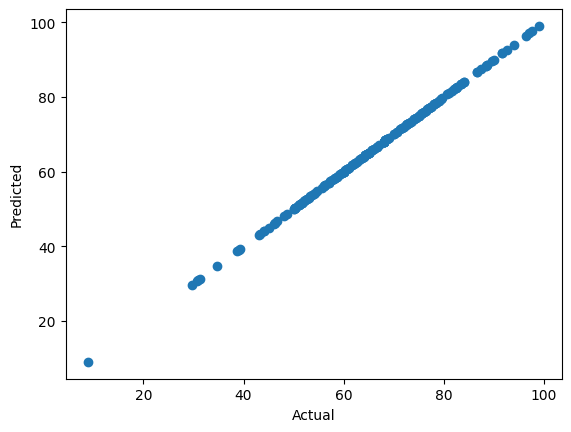

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

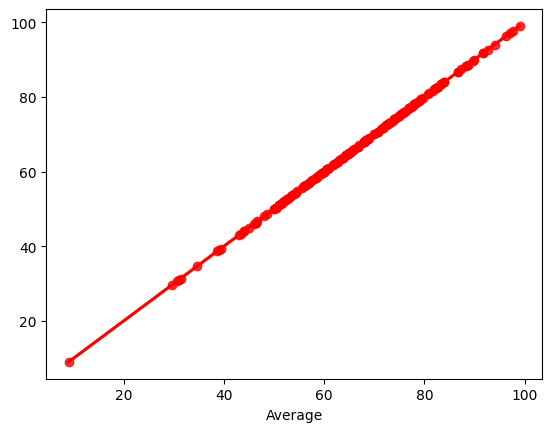

In [60]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='Red')
plt.show()

### Difference b/w Actual and Predicted values

In [62]:
pd.DataFrame(data={"Actual":y_test, "Predicted":y_pred, 'Difference':y_test-y_pred})

,Actual,Predicted,Difference
157,60.000000,60.000000,-7.105427e-15
220,66.000000,66.000000,1.421085e-14
382,77.000000,77.000000,0.000000e+00
325,88.666667,88.666667,1.421085e-14
134,76.000000,76.000000,0.000000e+00
...,...,...,...
45,58.666667,58.666667,0.000000e+00
309,52.666667,52.666667,0.000000e+00
22,50.333333,50.333333,-7.105427e-15
965,68.000000,68.000000,0.000000e+00
